In [1]:
import sys, os

# Add your project src folders explicitly      ## TO adapt 
sys.path.insert(0, r"C:\Users\boulette\OneDrive\Bureau\Final push\Project_EIT_CT_2025\src")
sys.path.insert(0, r"C:\Users\boulette\OneDrive\Bureau\Final push\Project_EIT_CT_2025\src_aatae")


import importlib.util
for mod in ["CT_processing_functions", "mesh_generating_functions", "mesh_post_processing"]:
    print(mod, "->", "FOUND" if importlib.util.find_spec(mod) else "NOT FOUND")


import numpy as np
import argparse
import pickle

from pyeit.mesh import PyEITMesh
import pyeit.mesh as mesh
from pyeit.eit.interp2d import sim2pts
from pyeit.eit.protocol import PyEITProtocol
from pyeit.visual.plot    import create_mesh_plot, create_plot
from pyeit.mesh.shape import *
from pyeit.mesh.utils import edge_list
from pyeit.mesh import PyEITMesh


from CT_processing_functions import *
from mesh_generating_functions import *
from mesh_post_processing import *


CT_processing_functions -> FOUND
mesh_generating_functions -> FOUND
mesh_post_processing -> FOUND


In [2]:

ORGANS = {
    "adrenal_gland": [
        "adrenal_gland_left.nii.gz",
        "adrenal_gland_right.nii.gz",
    ],
    "atrial_appendage": [
        "atrial_appendage_left.nii.gz",
        "atrial_appendage_right.nii.gz",
    ],
    "autochthon": [
        "autochthon_left.nii.gz",
        "autochthon_right.nii.gz",
    ],
    "brain": [
        "brain.nii.gz",
    ],
    "aorta": [
        "aorta.nii.gz",
    ],
    "brachiocephalic_trunk": [
        "brachiocephalic_trunk.nii.gz",
    ],
    "brachiocephalic_vein": [
        "brachiocephalic_vein_left.nii.gz",
        "brachiocephalic_vein_right.nii.gz",
    ],
    "clavicula": [
        "clavicula_left.nii.gz",
        "clavicula_right.nii.gz",
    ],
    "colon": [
        "colon.nii.gz",
    ],
    "common_carotid_artery": [
        "common_carotid_artery_left.nii.gz",
        "common_carotid_artery_right.nii.gz",
    ],
    "costal_cartilages": [
        "costal_cartilages.nii.gz",
    ],
    "duodenum": [
        "duodenum.nii.gz",
    ],
    "esophagus": [
        "esophagus.nii.gz",
    ],
    "femur": [
        "femur_left.nii.gz",
        "femur_right.nii.gz",
    ],
    "gallbladder": [
        "gallbladder.nii.gz",
    ],
    "gluteus_maximus": [
        "gluteus_maximus_left.nii.gz",
        "gluteus_maximus_right.nii.gz",
    ],
    "gluteus_medius": [
        "gluteus_medius_left.nii.gz",
        "gluteus_medius_right.nii.gz",
    ],
    "gluteus_minimus": [
        "gluteus_minimus_left.nii.gz",
        "gluteus_minimus_right.nii.gz",
    ],
    "heart": [
        "heart.nii.gz",
    ],
    "hip": [
        "hip_left.nii.gz",
        "hip_right.nii.gz",
    ],
    "humerus": [
        "humerus_left.nii.gz",
        "humerus_right.nii.gz",
    ],
    "iliac_artery": [
        "iliac_artery_left.nii.gz",
        "iliac_artery_right.nii.gz",
    ],
    "iliac_vena": [
        "iliac_vena_left.nii.gz",
        "iliac_vena_right.nii.gz",
    ],
    "iliopsoas": [
        "iliopsoas_left.nii.gz",
        "iliopsoas_right.nii.gz",
    ],
    "inferior_vena_cava": [
        "inferior_vena_cava.nii.gz",
    ],
    "kidney": [
        "kidney_left.nii.gz",
        "kidney_right.nii.gz",
    ],
    "kidney_cyst": [
        "kidney_cyst_left.nii.gz",
        "kidney_cyst_right.nii.gz",
    ],
    "lung": [
        "lung_lower_lobe_left.nii.gz",
        "lung_lower_lobe_right.nii.gz",
        "lung_middle_lobe_right.nii.gz",
        "lung_upper_lobe_left.nii.gz",
        "lung_upper_lobe_right.nii.gz",
    ],
    "pancreas": [
        "pancreas.nii.gz",
    ],
    "pulmonary_vein": [
        "pulmonary_vein.nii.gz",
    ],
    "portal_and_splenic_vein": [
        "portal_vein_and_splenic_vein.nii.gz",
    ],
    "prostate": [
        "prostate.nii.gz",
    ],
    "ribs": [
        "rib_left_1.nii.gz",  "rib_left_2.nii.gz",  "rib_left_3.nii.gz",
        "rib_left_4.nii.gz",  "rib_left_5.nii.gz",  "rib_left_6.nii.gz",
        "rib_left_7.nii.gz",  "rib_left_8.nii.gz",  "rib_left_9.nii.gz",
        "rib_left_10.nii.gz", "rib_left_11.nii.gz", "rib_left_12.nii.gz",
        "rib_right_1.nii.gz", "rib_right_2.nii.gz", "rib_right_3.nii.gz",
        "rib_right_4.nii.gz", "rib_right_5.nii.gz", "rib_right_6.nii.gz",
        "rib_right_7.nii.gz", "rib_right_8.nii.gz", "rib_right_9.nii.gz",
        "rib_right_10.nii.gz","rib_right_11.nii.gz","rib_right_12.nii.gz",
    ],
    "sacrum": [
        "sacrum.nii.gz",
    ],
    "scapula": [
        "scapula_left.nii.gz",
        "scapula_right.nii.gz",
    ],
    "small_bowel": [
        "small_bowel.nii.gz",
    ],
    "spinal_cord": [
        "spinal_cord.nii.gz",
    ],
    "spleen": [
        "spleen.nii.gz",
    ],
    "sternum": [
        "sternum.nii.gz",
    ],
    "stomach": [
        "stomach.nii.gz",
    ],
    "subclavian_artery": [
        "subclavian_artery_left.nii.gz",
        "subclavian_artery_right.nii.gz",
    ],
    "superior_vena_cava": [
        "superior_vena_cava.nii.gz",
    ],
    "thyroid_gland": [
        "thyroid_gland.nii.gz",
    ],
    "trachea": [
        "trachea.nii.gz",
    ],
    "urinary_bladder": [
        "urinary_bladder.nii.gz",
    ],
    "vertebrae": [
        "vertebrae_C1.nii.gz",  "vertebrae_C2.nii.gz",  "vertebrae_C3.nii.gz",
        "vertebrae_C4.nii.gz",  "vertebrae_C5.nii.gz",  "vertebrae_C6.nii.gz",
        "vertebrae_C7.nii.gz",  "vertebrae_L1.nii.gz",  "vertebrae_L2.nii.gz",
        "vertebrae_L3.nii.gz",  "vertebrae_L4.nii.gz",  "vertebrae_L5.nii.gz",
        "vertebrae_S1.nii.gz",  "vertebrae_T1.nii.gz",  "vertebrae_T2.nii.gz",
        "vertebrae_T3.nii.gz",  "vertebrae_T4.nii.gz",  "vertebrae_T5.nii.gz",
        "vertebrae_T6.nii.gz",  "vertebrae_T7.nii.gz",  "vertebrae_T8.nii.gz",
        "vertebrae_T9.nii.gz",  "vertebrae_T10.nii.gz", "vertebrae_T11.nii.gz",
        "vertebrae_T12.nii.gz",
    ],
    "liver": ["liver.nii.gz"]
    }

case_id= "s0011"
ct_path= os.path.join("Data_set", case_id, "ct.nii.gz")
seg_dir = os.path.join("Data_set", case_id, "segmentations")



In [3]:
_, z_min, z_max,_ = compute_z_bounds(ct_path, seg_dir, top="vertebrae_T3", bottom="vertebrae_L1", margin=0)   ## zone you want to crop , fore example here is between vertebrae_T3 and vertebrae_L1#
present_organs = organs_present_in_crop(seg_dir, z_min, z_max, ORGANS) ## List of organs present in the cropped zone ##

mask3d  = Get_all_masks(case_id, present_organs, ORGANS) ## 3D mask of the cropped zone ##



In [4]:
from mesh_generating_functions import build_and_store_meshes

## effect of h0 ##

mask,mesh_obj,barsA = build_and_store_meshes(   
        case_id        = case_id,
        base_dir       = "Data_set",
        organs         = ORGANS,
        slice_index    = z_min+1,
        z_min          =z_min,
        z_max          =z_max, 
        mask3d         = mask3d,
        present_organs = present_organs,
        n_el           = 16,
        h0             = 0.025,
        output_dir     = "aa"
)

mask_1,mesh_obj_1,barsB= build_and_store_meshes(
        case_id        = case_id,
        base_dir       = "Data_set",
        organs         = ORGANS,
        slice_index    = z_min+1,
        z_min          =z_min,
        z_max          =z_max, 
        mask3d         = mask3d,
        present_organs = present_organs,
        n_el           = 16,
        h0             = 0.25,
        output_dir     = "aa"
)

==> Traitement de s0011 slice 204
mask de la slice 204crée !
mesh de la slice 204 géneré !
==> Traitement de s0011 slice 204
mask de la slice 204crée !
mesh de la slice 204 géneré !


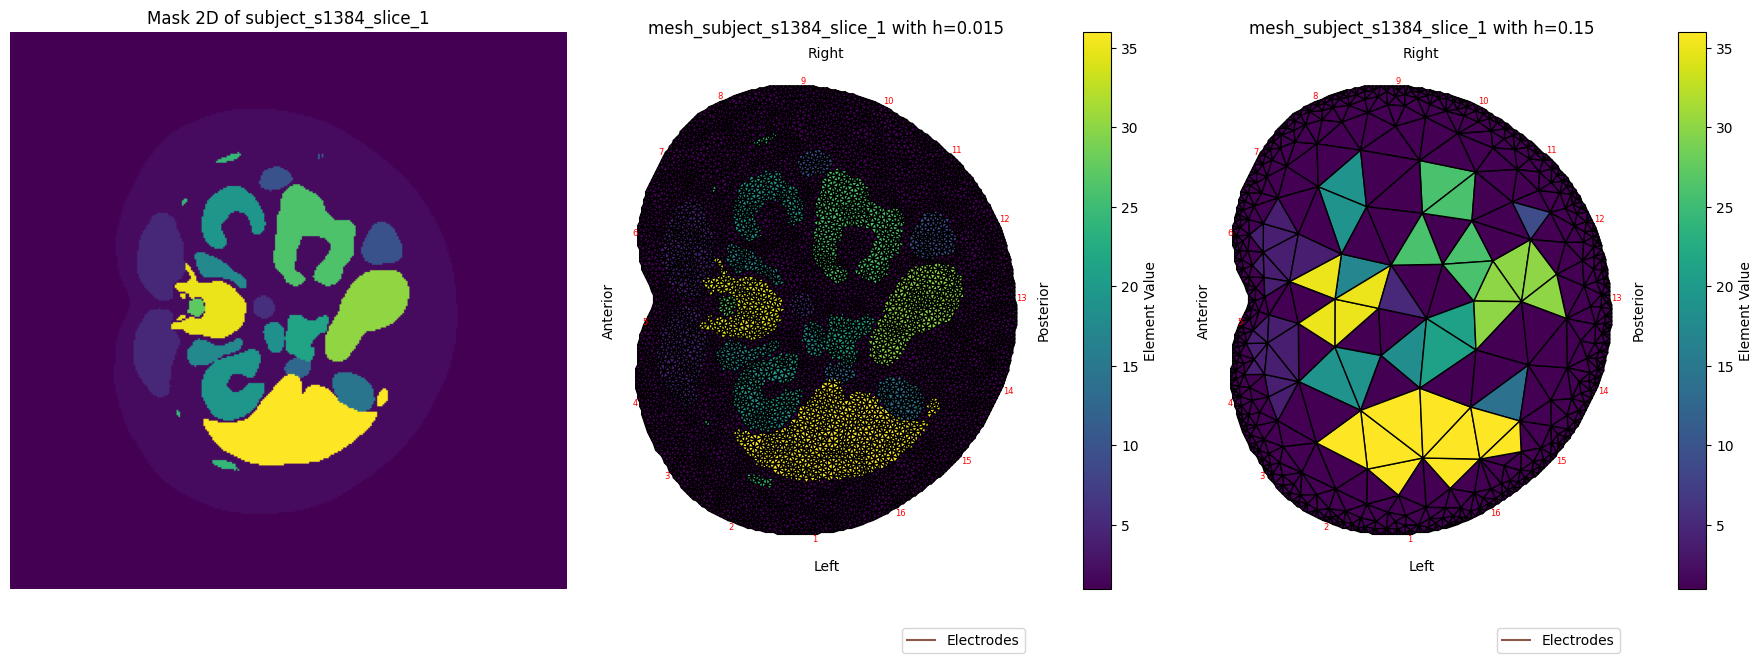

In [5]:
## Plots
import matplotlib.pyplot as plt

fig, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(18, 6))
    
ax0.imshow(mask, cmap='viridis')
ax0.set_title("Mask 2D of subject_s1384_slice_1")
ax0.axis("off")
  
create_mesh_plot(
                    ax1,mesh_obj,
                    electrodes=mesh_obj.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
)
ax1.set_title("mesh_subject_s1384_slice_1 with h=0.015")
ax1.axis("off")


create_mesh_plot(
                    ax2,mesh_obj_1,
                    electrodes=mesh_obj_1.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
        )
ax2.set_title("mesh_subject_s1384_slice_1 with h=0.15")
ax2.axis("off")
    # Aspect carré pour que chaque pixel soit un carré

    # Supprime les graduations si vous souhaitez


plt.tight_layout()
plt.show()

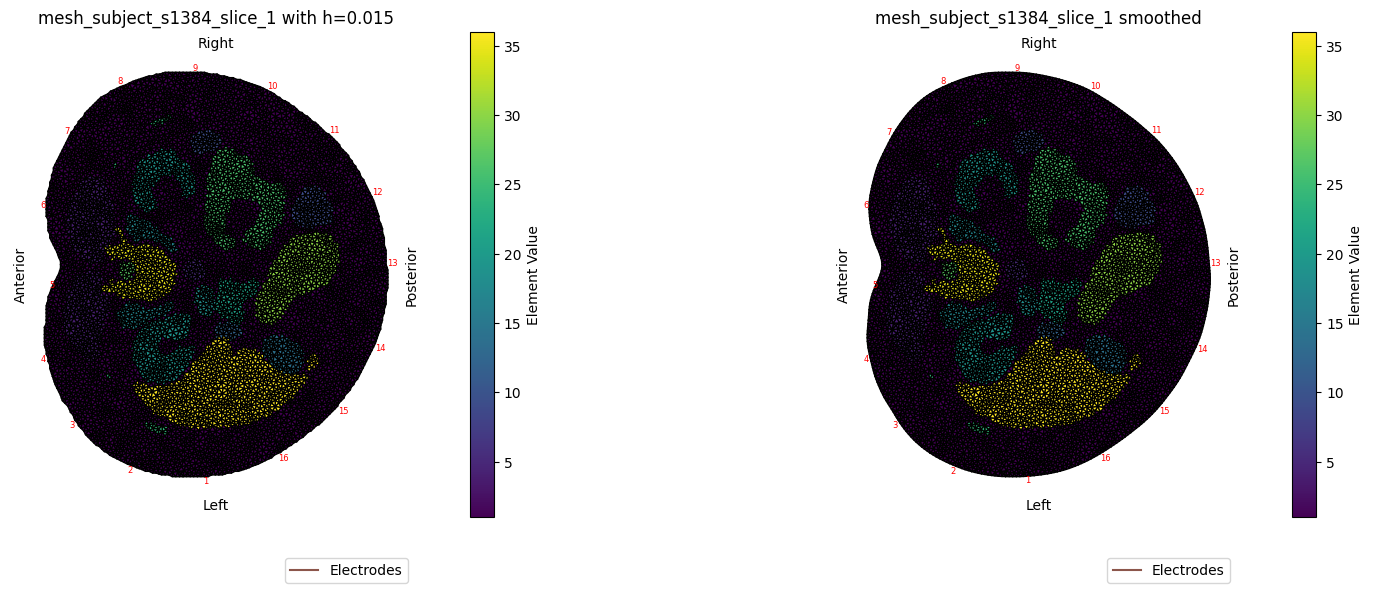

In [6]:
###smoothing test##
from mesh_post_processing import smooth_mesh_boundary

meshA_smooth = smooth_mesh_boundary(mesh_obj, iterations=10, alpha=0.7,bars=barsA)  ## check code in ##

fig, (ax1,ax2 )= plt.subplots(1, 2, figsize=(18, 6))
  
create_mesh_plot(
                    ax1,mesh_obj,
                    electrodes=mesh_obj.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
)
ax1.set_title("mesh_subject_s1384_slice_1 with h=0.015")
ax1.axis("off")


create_mesh_plot(
                    ax2,meshA_smooth,
                    electrodes=meshA_smooth.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
        )
ax2.set_title("mesh_subject_s1384_slice_1 smoothed")
ax2.axis("off")
    # Aspect carré pour que chaque pixel soit un carré

    # Supprime les graduations si vous souhaitez


plt.tight_layout()
plt.show()


In [7]:
from mesh_post_processing import extract_ordered_boundary, resample_contour_by_arclength, align_contours, ThinPlateSpline2D

bnd_idx_A, bnd_pts_A = extract_ordered_boundary(mesh_obj_1,barsB)
bnd_idx_B, bnd_pts_B = extract_ordered_boundary(meshA_smooth,barsA)


N = 400
src = resample_contour_by_arclength(bnd_pts_A, N)
dst = resample_contour_by_arclength(bnd_pts_B, N)


src_aligned, shift, was_reversed = align_contours(src, dst)
# print(f"Alignement → shift = {shift}, inversion appliquée = {was_reversed}")

# src= meshA.node[meshA.el_pos, :2]  # on ne garde que les 2 premières colonnes (x,y)
# dst= meshB.node[meshB.el_pos, :2]  # on ne garde que les 2 premières colonnes (x,y)


tps = ThinPlateSpline2D()
tps.fit(src_aligned, dst)
        # 6) warp ALL nodes of A
nodesA_warp = tps.transform(mesh_obj_1.node[:,:2])  # on ne garde que les 2 premières colonnes (x,y)
        # 7) rebuild meshC
meshC = PyEITMesh(
        node    =  nodesA_warp,
        element = mesh_obj_1.element,
        el_pos  = mesh_obj_1.el_pos
)
meshC.perm = mesh_obj_1.perm

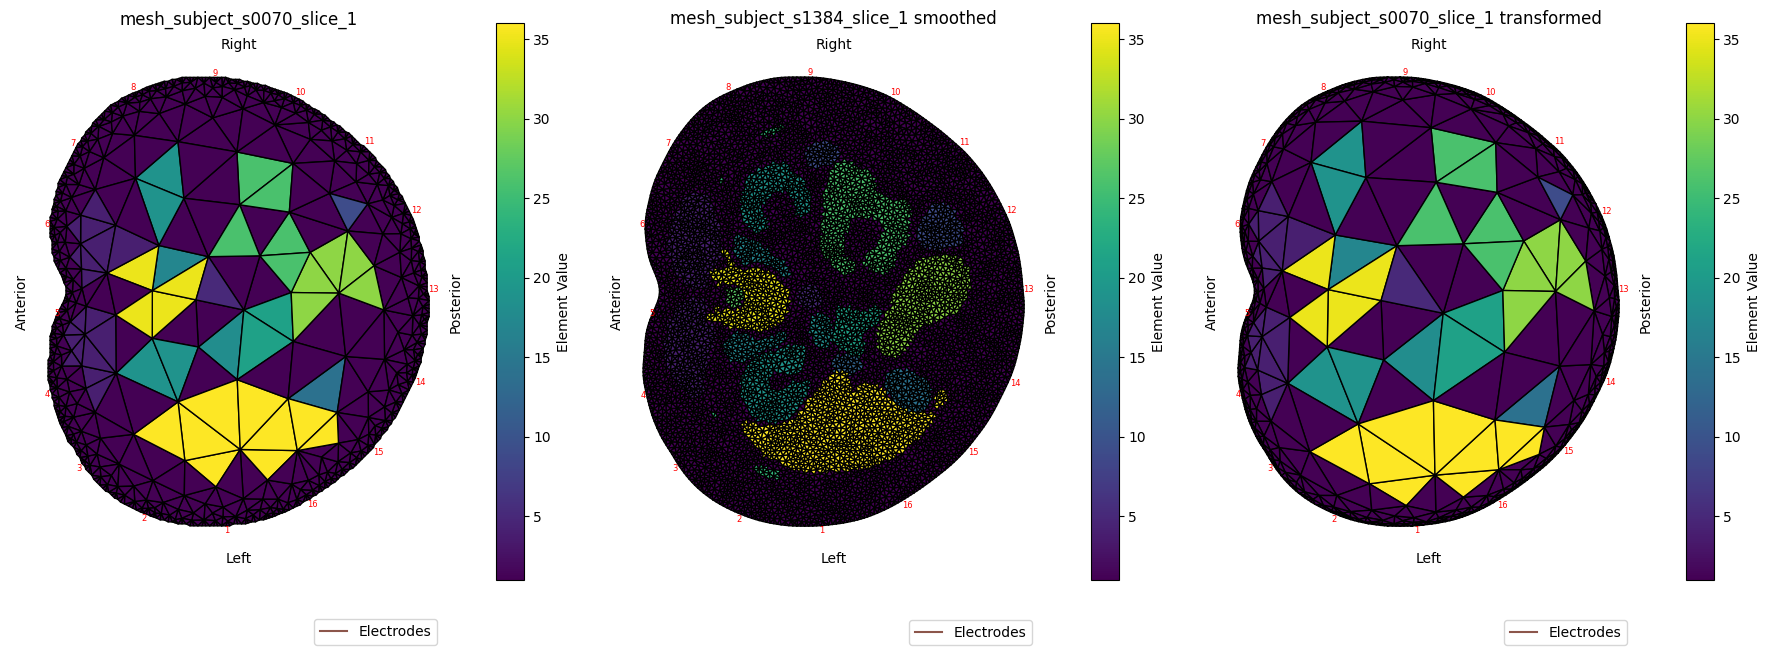

In [8]:
fig, (ax0,ax1,ax2 )= plt.subplots(1, 3, figsize=(18, 6))
  
create_mesh_plot(
                    ax0,mesh_obj_1,
                    electrodes=mesh_obj_1.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
)
ax0.set_title("mesh_subject_s0070_slice_1")
ax0.axis("off")


create_mesh_plot(
                    ax1,meshA_smooth,
                    electrodes=meshA_smooth.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
        )
ax1.set_title("mesh_subject_s1384_slice_1 smoothed")
ax1.axis("off")
    # Aspect carré pour que chaque pixel soit un carré

    # Supprime les graduations si vous souhaitez
create_mesh_plot(
                    ax2,meshC,
                    electrodes=meshC.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
        )
ax2.set_title("mesh_subject_s0070_slice_1 transformed")
ax2.axis("off")

plt.tight_layout()
plt.show()

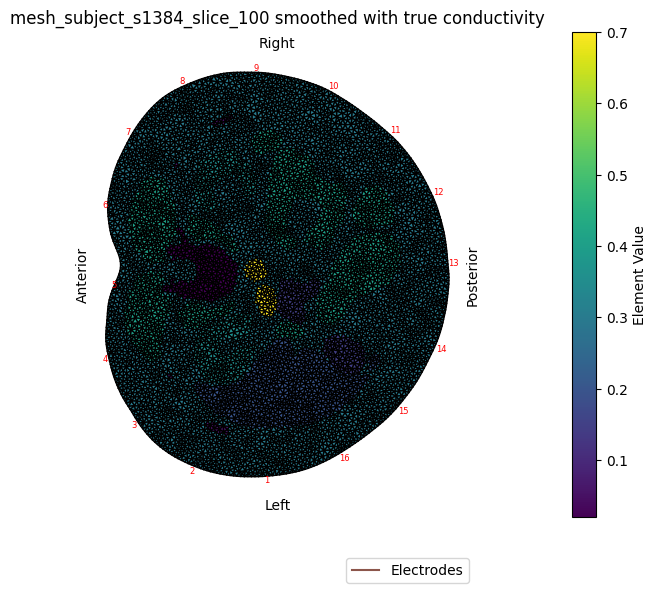

In [10]:
def sig_update(org_list, sig):
    import numpy as np

    # conductivity lookup
    cond_table = {
        'soft_tissue': 0.30,
        'adrenal_gland': 0.25,
        'autochthon': 0.40,
        'clavicula': 0.02,
        'costal_cartilages': 0.08,
        'ribs': 0.05,
        'scapula': 0.02,
        'sternum': 0.02,
        'skull': 0.02,
        'humerus': 0.02,
        'femur': 0.02,
        'vertebrae': 0.02,
        'sacrum': 0.02,
        'gluteus_maximus': 0.40,
        'gluteus_minimus': 0.40,
        'gluteus_medius': 0.40,
        'iliopsoas': 0.40,
        'hip': 0.08,
        'iliac_arterie': 0.70,
        'iliac_vein': 0.70,
        'brachiocephalic_trunk': 0.70,
        'brachiocephalic_vein': 0.70,
        'common_carotid_artery': 0.70,
        'subclavian_artery': 0.70,
        'aorta': 0.70,
        'superior_vena_cava': 0.70,
        'inferior_vena_cava': 0.70,
        'portal_and_splenic_vein': 0.70,
        'pulmonary_vein': 0.70,
        'trachea': 0.15,
        'lung': 0.15,
        'heart': 0.50,
        'atrial_appendage': 0.20,
        'esophagus': 0.40,
        'stomach': 0.40,
        'duodenum': 0.40,
        'small_bowel': 0.40,
        'colon': 0.40,
        'liver': 0.20,
        'gallbladder': 0.15,
        'pancreas': 0.15,
        'spleen': 0.20,
        'thyroid_gland': 0.50,
        'kidney': 0.35,
        'kidney_cyst': 1.50,
        'urinary_bladder': 1.50,
        'prostate': 0.35,
        'spinal_cord': 0.30,
    }

    # build master list
    master_names = ['soft_tissue'] + list(org_list)

    master_values = []
    for name in master_names:
        if name not in cond_table:
            raise ValueError(f"No conductivity defined for '{name}'")
        master_values.append(cond_table[name])
    master_values = np.array(master_values)

    # --- Adjust labels (1-based → 0-based) ---
    sig_idx = np.asarray(sig, dtype=int) - 1  

    # check for out-of-range
    if sig_idx.max() >= len(master_values) or sig_idx.min() < 0:
        raise IndexError("Some labels in 'sig' exceed available mapping")

    sigma_real = master_values[sig_idx]

    return sigma_real





fig, ax0= plt.subplots(1, 1, figsize=(18, 6))
meshA_smooth.perm = sig_update(present_organs, meshA_smooth.perm)
create_mesh_plot(
                    ax0,meshA_smooth,
                    electrodes=meshA_smooth.el_pos,
                    coordinate_labels="radiological",
                    marker_text_kwargs={"color": "red", "fontsize": 6}
        )
ax0.set_title("mesh_subject_s1384_slice_100 smoothed with true conductivity")
ax0.axis("off")
plt.tight_layout()
plt.show()